#Random Forest

## Importing the dataset (Iris dataset)

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()
import seaborn as sns
import matplotlib.pyplot as plt

Printing target and feature names 

In [ ]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [ ]:
print (iris.target_names)

['setosa' 'versicolor' 'virginica']


Creating a dataframe 

In [ ]:
import pandas as pd
data=pd.DataFrame({
    'sepal length':iris.data[:,0],
    'sepal width':iris.data[:,1],
    'petal length':iris.data[:,2],
    'petal width':iris.data[:,3],
    'species':iris.target
})
data.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
data.shape

(150, 5)

In [ ]:
data.size

750

In [ ]:
data.describe()

,sepal length,sepal width,petal length,petal width,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


## EDA 

Pair plot for the data 

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


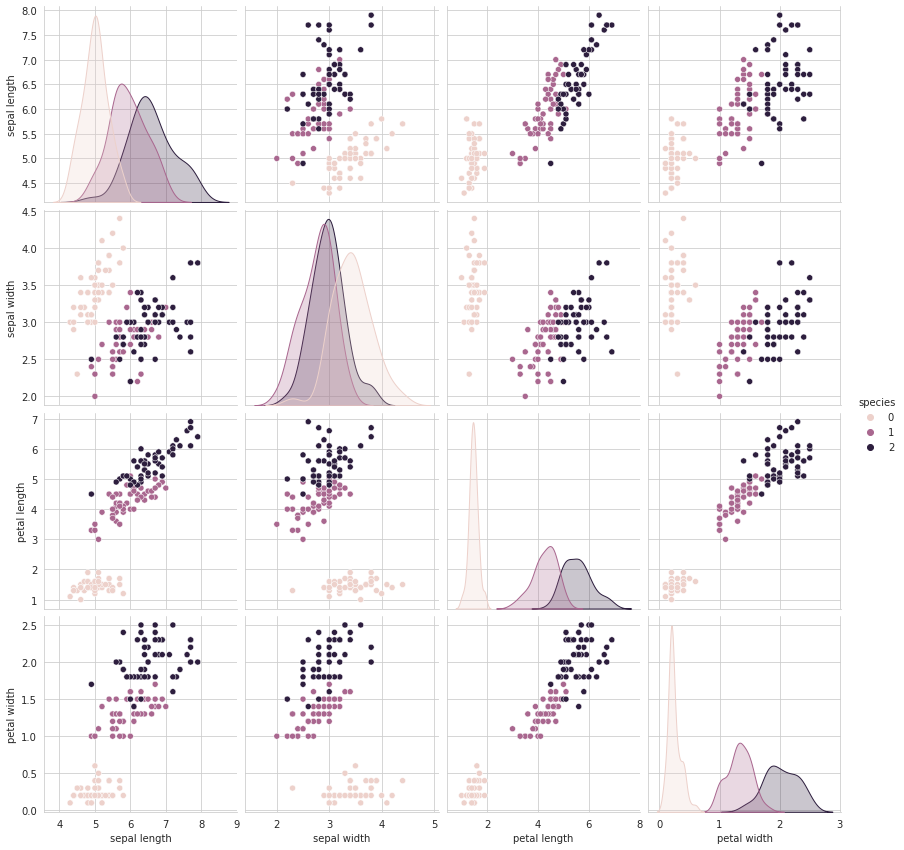

In [ ]:
sns.set_style("whitegrid");
sns.pairplot(data,hue="species",size=3);
plt.show()

It allows us to see both distribution of single variables and relationships between two variables. It is useful when several continuous variables are present.

## Univariate Analysis 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

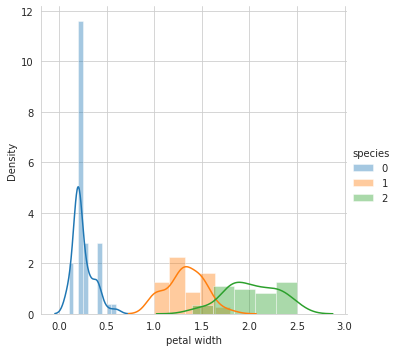

In [ ]:
sns.FacetGrid(data,hue="species",height=5) \
    .map(sns.distplot,"petal width") \
    .add_legend();
plt.show();

**Observations:**
There is an overlap between vericolor and virginca

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated

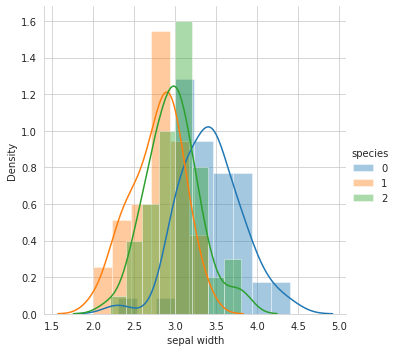

In [ ]:
sns.FacetGrid(data,hue="species",size=5) \
    .map(sns.distplot,"sepal width") \
    .add_legend();
    
plt.show();

**Observations**
Virginica and versicolor are fully overlapped.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated

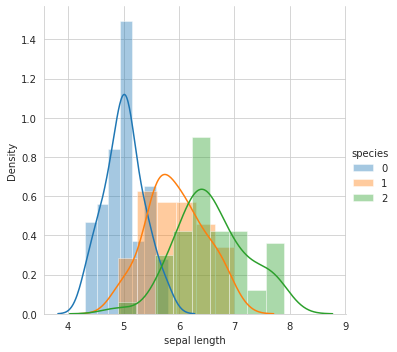

In [ ]:
sns.FacetGrid(data,hue="species",size=5) \
    .map(sns.distplot,"sepal length") \
    .add_legend();
    
plt.show();

**Observations**
1. Here we can’t separate any class because all of them are overlapped
2. From above observations we can say that Sepal length is worst than Petal length and Petal width

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated

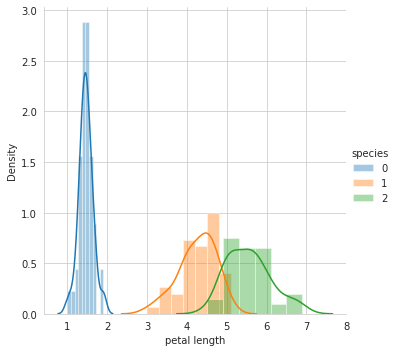

In [ ]:
sns.FacetGrid(data,hue="species",size=5) \
    .map(sns.distplot,"petal length") \
    .add_legend();
    
plt.show();

**Observations**
1. Setosa shows better separation as compared to earlier petal width
2. There is an overlap between vericolor and virginca

## Creating training/testing datasets

In [ ]:
from sklearn.model_selection import train_test_split

X=data[['sepal length', 'sepal width', 'petal length', 'petal width']]  # Features
y=data['species']

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Model training 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)

RandomForestClassifier()

## Model prediction

In [ ]:
y_pred=clf.predict(X_test)

## Performance metrics

In [ ]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
acc = metrics.accuracy_score(y_test, y_pred)
acc = acc * 100
acc

Accuracy: 0.9777777777777777


97.77777777777777

In [ ]:
print("Classification report",metrics.classification_report(y_test, y_pred))

Classification report               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.94      0.97        16
           2       0.93      1.00      0.97        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [ ]:
df = pd.DataFrame(data={'predictions': y_pred, 'actual': y_test})

In [ ]:
df.sort_index()

,predictions,actual
4,0,0
5,0,0
6,0,0
7,0,0
9,0,0
17,0,0
25,0,0
31,0,0
35,0,0
37,0,0


## Visualizing important features 

In [ ]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=iris.feature_names).sort_values(ascending=False)
feature_imp

petal length (cm)    0.439271
petal width (cm)     0.431084
sepal length (cm)    0.093213
sepal width (cm)     0.036432
dtype: float64

No handles with labels found to put in legend.


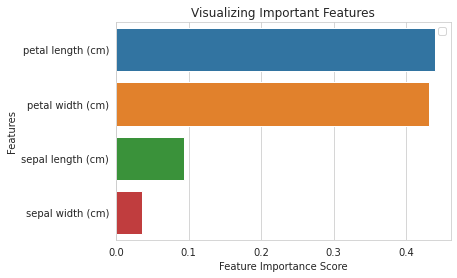

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

Feature importance refers to techniques that assign a score to input features based on how useful they are at predicting a target variable. From the given dataset we can see that the feature 'sepal width' has the least affect on the target variable. So, we can try dropping the column and re-train our model on the reduced dataset.

## Reducing dimensions

In [ ]:
X1=data[['petal length', 'petal width','sepal length']]  # Removed feature "sepal width"
y1=data['species']                                       
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3) 

In [ ]:
rf=RandomForestClassifier(n_estimators=100)
rf.fit(X1_train,y1_train)
y_pred1=rf.predict(X1_test)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y1_test, y_pred1))

Accuracy: 0.9777777777777777


In [ ]:
print("Classification report",metrics.classification_report(y1_test, y_pred1))

Classification report               precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.92      1.00      0.96        11
           2       1.00      0.94      0.97        17

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [ ]:
df1 = pd.DataFrame(data={'predictions': y_pred1, 'actual': y1_test})

In [ ]:
df1.sort_index()

,predictions,actual
1,0,0
3,0,0
4,0,0
7,0,0
8,0,0
15,0,0
16,0,0
22,0,0
25,0,0
26,0,0


## Hyper-parameter tuning

Using CV to estimate the best values for the parameters used in the base model

In [ ]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': ['sqrt', 'log2'],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [500, 700, 1000]
}
# Create a base model
clf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = clf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

Fit the grid search to the data

In [ ]:
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [500, 700, 1000]},
             verbose=2)

In [ ]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 100,
 'max_features': 'log2',
 'min_samples_leaf': 4,
 'min_samples_split': 8,
 'n_estimators': 500}

In [ ]:
import numpy as np
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    return accuracy

In [ ]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_test)

Model Performance
Average Error: 0.0222 degrees.
Accuracy = 96.67%.


In [ ]:
print("Baseline accuracy: ", acc)
print("Accuracy after hp tuning: ", grid_accuracy)
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - acc) / acc))

Baseline accuracy:  97.77777777777777
Accuracy after hp tuning:  96.66666666666667
Improvement of -1.14%.


## Hyper-parameter tuning on reduced dataset

In [ ]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid1 = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': ['auto','sqrt', 'log2'],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [500, 700, 1000]
}
# Create a based model
clf = RandomForestClassifier()
# Instantiate the grid search model
grid_search1 = GridSearchCV(estimator = clf, param_grid = param_grid1, 
                          cv = 3, n_jobs = -1, verbose = 2)

Fit the grid search to the data

In [ ]:
grid_search1.fit(X1_train,y1_train)

Fitting 3 folds for each of 324 candidates, totalling 972 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [500, 700, 1000]},
             verbose=2)

In [ ]:
grid_search1.best_params_

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 'auto',
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 500}

In [ ]:
best_grid1 = grid_search1.best_estimator_
grid_accuracy1 = evaluate(best_grid1, X1_test, y1_test)

Model Performance
Average Error: 0.0222 degrees.
Accuracy = 98.21%.


In [ ]:
print("Baseline accuracy: ", acc)
print("Accuracy after hp tuning: ", grid_accuracy1)
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy1 - acc) / acc))

Baseline accuracy:  97.77777777777777
Accuracy after hp tuning:  98.21428571428571
Improvement of 0.45%.
